In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.wcs import WCS
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.utils.data import download_file
import warnings

catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

#A100-NSA Catalog
myTab=Table.read(catalog_path+'a100-nsa-for-adap.fits')

In [2]:
# R-band Magnitude Limit
Mrmax = -18.2
Mr = myTab['ABSMAG'][:,4]
Mrflag = Mr < Mrmax

# Velocity input
vinput = int(input())
v = myTab['Vhelio']
vflag = (v > -1*vinput) & (v < vinput)

cut = Mrflag & vflag

cuttab = myTab[cut]

 1500


# Computing 5th Nearest Neighbor

In [3]:
#Computes 5 nearest neighbors of one selected galaxy

# Defining ra and dec, making empty array for fifth nearest neighbors for later use
ra = np.array(cuttab['RA'])
dec = np.array(cuttab['DEC'])
fifthnn = np.zeros(len(ra))

# Sets up array of tuples of ra and dec points for each galaxy
points = []
for i in range(len(dec)):
    points.append((ra[i],dec[i]))

def distance(ra1, dec1, ra2, dec2):
    return ((ra1 - ra2) ** 2 + (dec1 - dec2) ** 2) ** ( 1 / 2)

def kClosest(points, target, K):
    pts = []
    n = len(points)
    d = []
 
    for i in range(n):
        d.append({
            "first": distance(points[i][0], points[i][1], target[0], target[1]), 
            "second": i
        })
     
    d = sorted(d, key=lambda l:l["first"])
 
    for i in range(K):
        pt = []
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)
 
    return pts

#Initial parameters
target = points[0]
K = 6

#Computes 5 nearest neighbors of one selected galaxy
dist = []
fnn = []

for pt in kClosest(points, target, K):
    dist.append(distance(pt[0], pt[1], target[0], target[1]))
    fnn.append((pt[0],pt[1]))
    #print(f"{pt[0]} {pt[1]}")
    
print(f"Closest Points = {fnn[1:5]}")

print(f"Distances (Degrees) = {dist}")

Closest Points = [(0.6580024759606975, 16.643731319970442), (0.8674337580835826, 16.73615246179746), (1.591291431871461, 17.437278420621006), (1.581731326757165, 14.327454416164155)]
Distances (Degrees) = [0.0, 0.5214704238783213, 0.592989329927536, 1.508153366598167, 1.974232935138005, 2.5430251209849937]


In [4]:
#print(points)

In [5]:
#Computes 5 nearest neighbors of each galaxy

# Defining ra and dec, making empty array for fifth nearest neighbors for later use
ra = np.array(cuttab['RA'])
dec = np.array(cuttab['DEC'])
fifthnn = np.zeros(len(ra))

# Sets up array of tuples of ra and dec points for each galaxy
points = []
for i in range(len(dec)):
    points.append((ra[i],dec[i]))

# Calculates distance between two points
def distance(ra1, dec1, ra2, dec2):
    return ((ra1 - ra2)**2 + (dec1 - dec2)**2)**(1/2)

# Finds the closest points to a target point
def kClosest(points, target, K):
    pts = []
    n = len(points)
    d = []
 
    for i in range(n):
        d.append({
            "first": distance(points[i][0], points[i][1], target[0], target[1]), 
            "second": i
        })
     
    d = sorted(d, key=lambda l:l["first"])
 
    for i in range(K):
        pt = []
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)
 
    return pts

#Initial parameters
K = 6
z0 = np.array(cuttab['ZDIST'])

#Computes 5 nearest neighbors of one selected galaxy
dist = []
fnn = []
z = []
for i in range(len(points)):
    target = points[i]
    redshift = z0[i]
    for pt in kClosest(points, target, K):
        dist.append(distance(pt[0], pt[1], target[0], target[1]))
        fnn.append((pt[0],pt[1]))
        z.append(redshift)
        

In [21]:
subz = [z[n:n+6] for n in range(0, len(z), 6)]

In [7]:
subdist = [dist[n:n+6] for n in range(0, len(dist), 6)]
print(subdist[0:2])

[[0.0, 0.5214704238783213, 0.592989329927536, 1.508153366598167, 1.974232935138005, 2.5430251209849937], [0.0, 0.9008014396663964, 1.1802036211171796, 2.528267123887345, 2.634988284098588, 2.644761089426649]]


In [8]:
subfnn = [fnn[n:n+6] for n in range(0, len(fnn), 6)]
print(subfnn[0])

[(0.8125990364294372, 16.14570390458945), (0.6580024759606975, 16.643731319970442), (0.8674337580835826, 16.73615246179746), (1.591291431871461, 17.437278420621006), (1.581731326757165, 14.327454416164155), (2.1247261268751685, 18.324074686728974)]


In [24]:
#print(len(points))
#print(len(dist))

In [26]:
# Converting disance between galaxies to kpc

# Finding distance
H0 = 2.3*10**(-18) #/s
c = 3*10**8 #m/s

v = subz*c 
d = v/H0 #m

# Small angle approximation
kpc = (d*subdist)*(3*10**(-19)) #kpc

MemoryError: 

10692


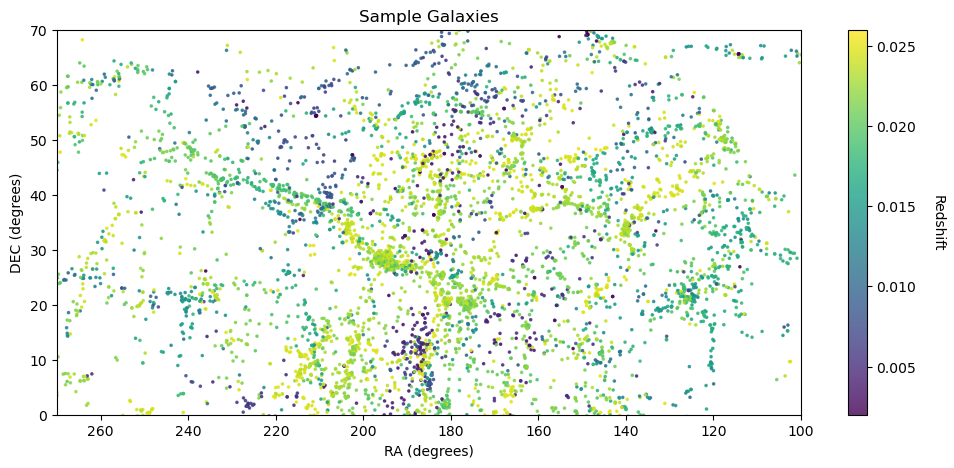

In [13]:
ra = cuttab['RA']
dec = cuttab['DEC']
ccode = cuttab['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.8,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)
plt.clim(0.002,0.026)